# Project C - Prediction of Soyabean wilting levels

Team :

- Tushar Dahibhate
- Sharvari Natu
- Mohnish Ramani

In [0]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing all the essential libraries

In [0]:
from keras import backend as K 
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import optimizers

## Setting up the paths and the directories

In [0]:
import os

train_data_dir = "/content/drive/My Drive/NN-ProjectC/Project_C1/Final/train_val_test_no_aug/train"
val_data_dir = "/content/drive/My Drive/NN-ProjectC/Project_C1/Final/train_val_test_no_aug/val"

num_train = 0
num_val = 0
num_test = 0

for i in os.listdir(train_data_dir):
  num_train += len(os.listdir(os.path.join(train_data_dir, i)))
  
for i in os.listdir(val_data_dir):
  num_val += len(os.listdir(os.path.join(val_data_dir, i)))

img_width, img_height = 224, 224

# Check if the images are RGB and change the channels likewise
if K.image_data_format() == 'channels_first':
  input_shape= (3, img_width, img_height)
else:
  input_shape = (img_width, img_height, 3)

print ("Number of training samples: ", num_train)
print ("Number of validation samples: ", num_val)

Number of training samples:  714
Number of validation samples:  171


## Defining the model

In [0]:
def get_model(learning_rate = 0.0001):
  
  model = Sequential()
  model.add(Conv2D(32,(3,3), input_shape = input_shape))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))

  model.add(Conv2D(32,(3,3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))

  model.add(Conv2D(64,(2,2)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))

  model.add(Flatten())

  model.add(Dense(64))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(5))
  model.add(Activation('softmax'))

  optimizer = optimizers.adam(learning_rate)
                                              
  model.compile(loss = "categorical_crossentropy", optimizer = optimizer, metrics = ['accuracy'])
  
  return model

## Training the model

In [0]:
batch_sizes = [8]

learning_rates = [0.0001]

histories = []

epochs = 100

i = 0

for batch_size in batch_sizes:
  
  for learning_rate in learning_rates:
    
    print("Batch Size : {} Learning rate: {}".format(batch_size, learning_rate))
    
    train_datagen = ImageDataGenerator(rescale = 1./255)

    train_generator = train_datagen.flow_from_directory(train_data_dir, target_size =(img_width, img_height), batch_size = batch_size, class_mode = 'categorical')

    validation_generator = train_datagen.flow_from_directory( val_data_dir, target_size =(img_width, img_height), batch_size = batch_size, class_mode ='categorical') 

    model = get_model(learning_rate)

    history = model.fit_generator(train_generator, steps_per_epoch = num_train // batch_size, epochs = epochs, validation_data = validation_generator, validation_steps = num_val// batch_size)

    model.save_weights("model_new"+ str(i+1) +".h5")
    
    histories.append(model.history.history)
    
    i = i + 1

Batch Size : 8 Learning rate: 0.0001
Found 714 images belonging to 5 classes.
Found 171 images belonging to 5 classes.





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





89/89 [==============================] - 229s 3s/step - loss: 1.4533 - acc: 0.4508 - val_loss: 1.3030 - val_acc: 0.5179
Epoch 2/100
89/89 [==============================] - 12s 136ms/step - loss: 1.3322 - acc: 0.5056 - val_loss: 1.2209 - val_acc: 0.5153
Epoch 3/100
89/89 [==============================] - 12s 135ms/step - loss: 1.2662 - acc: 0.5154 - val_loss: 1.2307 - val_acc: 0.5031
Epoch 4/100
89/89 [==============================] - 12s 133ms/step - loss: 1.2321 - acc: 0.5323 - val_loss: 1.1746 - val_acc: 0.6196
Epoch 5/100
89/89 [==============================] - 12s 133ms/step - loss: 1.1761 - acc: 0.5323 - val_loss: 1.0503 - val_a

## Printing the model architecture

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 109, 109, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 53, 53, 64)       

## Plotting the accuracy and loss curves

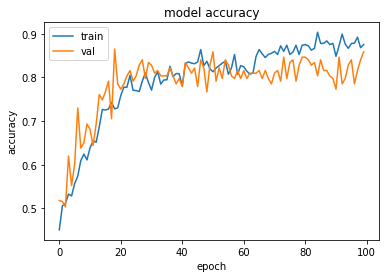

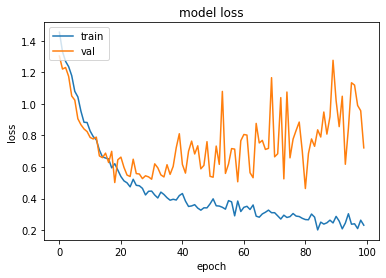

In [0]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig("Accuracy_curves.png")
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig("Loss_curves.png")
plt.show()

## Performing predictions for the testing dataset

In [0]:
import numpy
import sklearn.metrics as metrics
img_width, img_height = 224, 224
batch_size = 8
epochs = 100
test_set_dir = "/content/drive/My Drive/NN-ProjectC/Project_C1/Test/"

num_test = len(os.listdir(test_set_dir))

print ("Number of images in test set: ", num_test)

model = get_model(0.0001)

model.load_weights("/content/model_new1.h5")
  
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_set_dir, target_size =(img_width, img_height), 
                                                  batch_size = batch_size, class_mode =None, shuffle = False) 

test_steps_per_epoch = numpy.math.ceil(test_generator.samples / test_generator.batch_size)

predictions = model.predict_generator(test_generator, steps = test_steps_per_epoch)

print("PREDICTIONS: --->")
print(predictions)

predicted_classes = numpy.argmax(predictions, axis=1)

print("PREDICTED CLASSES: --->")
print (predicted_classes)

1
Number of images in test set:  1
Found 111 images belonging to 1 classes.
14
111
[[1.99931607e-01 7.98088312e-01 1.48942898e-04 1.82955933e-03
  1.59817239e-06]
 [5.98362625e-01 2.16734841e-01 1.83229640e-01 1.66375411e-03
  9.13485201e-06]
 [1.50071820e-02 1.93875385e-05 2.08103647e-05 9.84921396e-01
  3.12315387e-05]
 [7.56738931e-02 9.24270213e-01 1.89938510e-05 3.67442408e-05
  1.59914819e-07]
 [7.07451440e-03 5.93764184e-07 8.87482827e-07 9.92919147e-01
  4.90314915e-06]
 [7.77207196e-01 4.21413369e-02 1.79807141e-01 8.20536283e-04
  2.37755394e-05]
 [3.94198833e-06 3.67025166e-09 9.27196808e-08 1.65331960e-02
  9.83462751e-01]
 [3.11611984e-02 3.41837527e-03 9.64695156e-01 6.74886920e-04
  5.03644915e-05]
 [1.13299786e-10 6.80108571e-14 2.06830716e-11 3.64171022e-08
  1.00000000e+00]
 [2.41185006e-11 7.61030219e-15 3.01345147e-12 1.17952661e-08
  1.00000000e+00]
 [1.50764197e-01 8.48158896e-01 3.58816207e-04 7.14947470e-04
  3.16140881e-06]
 [9.98770893e-01 1.22901169e-03 7.445

## Converting the labels to one hot encoding

In [0]:
from tensorflow.keras.utils import to_categorical
y_pred = to_categorical(predicted_classes, dtype = 'int32')

## Writing the output to the file

In [0]:
import csv

with open('labels.csv', 'wt') as output:
    writer = csv.writer(output)
    writer.writerows(y_pred)    
output.close()

## Saving the history

In [0]:
import pickle
f = open('history_final.pckl', 'wb')
pickle.dump(history.history, f)
f.close()